In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/who-is-the-real-winner/sample_submission.csv
/kaggle/input/who-is-the-real-winner/train.csv
/kaggle/input/who-is-the-real-winner/test.csv


In [2]:
# Load data
data=pd.read_csv('/kaggle/input/who-is-the-real-winner/train.csv')
data_test=pd.read_csv('/kaggle/input/who-is-the-real-winner/test.csv')
data
data_test


,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state
0,0,Geeta Bharat Jain,MEERA BHAYANDAR,IND,2,70 Crore+,11 Crore+,MAHARASHTRA
1,1,Becharam Manna,SINGUR,AITC,1,2 Crore+,13 Lac+,WEST BENGAL
2,2,Sunil Vijay Tingre,VADGAON SHERI,NCP,3,49 Crore+,1 Crore+,MAHARASHTRA
3,3,Asit Mazumder (Tapan),CHUNCHURA,AITC,1,2 Crore+,0,WEST BENGAL
4,4,Hriday Narayan Singh Patel,SAGRI,SP,0,16 Crore+,2 Crore+,UTTAR PRADESH
...,...,...,...,...,...,...,...,...
1369,1369,Niladri Sekhar Dana,BANKURA,BJP,0,1 Crore+,0,WEST BENGAL
1370,1370,Mukesh Kumar Pal,PALLAHARA,BJD,1,0,13 Lac+,ODISHA
1371,1371,Vijay Shanker Dubey,MAHARAJGANJ,INC,1,5 Crore+,0,BIHAR
1372,1372,Satpal Singh Satti,UNA,BJP,1,2 Crore+,5 Lac+,HIMACHAL PRADESH


In [3]:
data.info()
# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              2059 non-null   int64 
 1   Candidate       2059 non-null   object
 2   Constituency ∇  2059 non-null   object
 3   Party           2059 non-null   object
 4   Criminal Case   2059 non-null   int64 
 5   Total Assets    2059 non-null   object
 6   Liabilities     2059 non-null   object
 7   state           2059 non-null   object
 8   Education       2059 non-null   object
dtypes: int64(2), object(7)
memory usage: 144.9+ KB


In [4]:
print(len(np.unique(data['Education'])))
np.unique(data['Education'])

# 10 classes in the target column

10


array(['10th Pass', '12th Pass', '5th Pass', '8th Pass', 'Doctorate',
       'Graduate', 'Graduate Professional', 'Literate', 'Others',
       'Post Graduate'], dtype=object)

In [5]:
print(len(np.unique(data['Candidate'])))
np.unique(data['Candidate'])

2039


array(['A . Vetriazhagan', 'A .K Saseendran', 'A C Srinivasa', ...,
       'Zirwal Narhari Sitaram', 'Ziyauddin Rizvi', 'Zubair Khan'],
      dtype=object)

In [6]:
print(len(np.unique(data['Constituency ∇'])))
np.unique(data['Constituency ∇'])

2037


array(['AAKOLA WEST', 'ABDASA', 'ABHANPUR', ..., 'ZAMANIA', 'ZIRA',
       'ZUNHEBOTO (ST)'], dtype=object)

In [7]:
print(len(np.unique(data['Party'])))
np.unique(data['Party'])

23


array(['AAP', 'AIADMK', 'AITC', 'BJD', 'BJP', 'CPI', 'CPI(M)', 'DMK',
       'INC', 'IND', 'JD(S)', 'JD(U)', 'JMM', 'NCP', 'NDPP', 'NPP', 'RJD',
       'SHS', 'SP', 'Sikkim Krantikari Morcha', 'TDP',
       'Tipra Motha Party', 'YSRCP'], dtype=object)

In [8]:
print(len(np.unique(data['state'])))
np.unique(data['state'])

28


array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'DELHI', 'GOA', 'GUJARAT', 'HARYANA',
       'HIMACHAL PRADESH', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA',
       'NAGALAND', 'ODISHA', 'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN',
       'SIKKIM', 'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL'], dtype=object)

In [9]:
df=data.copy()

In [10]:
df=df.drop(['ID'],axis=1)

In [11]:
X=df.drop(['Education','Candidate'],axis=1)
y=df['Education']

In [12]:
X

,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state
0,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU
1,KARERA (SC),BJP,0,1 Crore+,0,MADHYA PRADESH
2,MADIKERI,INC,0,7 Crore+,22 Lac+,KARNATAKA
3,BEGUSARAI,BJP,0,9 Crore+,24 Lac+,BIHAR
4,BANGAON DAKSHIN (SC),BJP,2,2 Crore+,61 Lac+,WEST BENGAL
...,...,...,...,...,...,...
2054,CHIRAYINKEEZHU,CPI,1,61 Lac+,10 Lac+,KERALA
2055,MAVLI,INC,0,2 Crore+,8 Lac+,RAJASTHAN
2056,MODI NAGAR,BJP,0,13 Crore+,85 Lac+,UTTAR PRADESH
2057,SHIRALA,NCP,1,25 Crore+,94 Lac+,MAHARASHTRA


In [13]:
for i in range(len(df)):
  X.iloc[i,3]=X.iloc[i,3].split()[0]
  X.iloc[i,4]=X.iloc[i,4].split()[0]

X['Total Assets']=X['Total Assets'].astype('int64')
X['Liabilities']=X['Liabilities'].astype('int64')

In [14]:
X

,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state
0,ANNA NAGAR,DMK,4,211,2,TAMIL NADU
1,KARERA (SC),BJP,0,1,0,MADHYA PRADESH
2,MADIKERI,INC,0,7,22,KARNATAKA
3,BEGUSARAI,BJP,0,9,24,BIHAR
4,BANGAON DAKSHIN (SC),BJP,2,2,61,WEST BENGAL
...,...,...,...,...,...,...
2054,CHIRAYINKEEZHU,CPI,1,61,10,KERALA
2055,MAVLI,INC,0,2,8,RAJASTHAN
2056,MODI NAGAR,BJP,0,13,85,UTTAR PRADESH
2057,SHIRALA,NCP,1,25,94,MAHARASHTRA


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Constituency ∇  2059 non-null   object
 1   Party           2059 non-null   object
 2   Criminal Case   2059 non-null   int64 
 3   Total Assets    2059 non-null   int64 
 4   Liabilities     2059 non-null   int64 
 5   state           2059 non-null   object
dtypes: int64(3), object(3)
memory usage: 96.6+ KB


In [ ]:
# OHE=OneHotEncoder(drop='first',dtype=np.int64)
# state=OHE.fit_transform(np.array(X['state']).reshape(-1,1)).toarray()
# party=OHE.fit_transform(np.array(X['Party']).reshape(-1,1)).toarray()

In [ ]:
# ls=[]
# lp=[]

# for i in range(27):
#   ls.append('s'+str(i))

# for i in range(22):
#   lp.append('p'+str(i))

# df1=pd.DataFrame(state,columns=ls)
# df2=pd.DataFrame(party,columns=lp)

In [ ]:
# X=pd.concat([X,df1,df2],axis=1)
# X=X.drop(['state','Party'],axis=1)
# X.head()

In [16]:
LE=LabelEncoder()
X['Constituency ∇']=LE.fit_transform(X['Constituency ∇'])
X['Party']=LE.fit_transform(X['Party'])
X['state']=LE.fit_transform(X['state'])

y=LE.fit_transform(y)
y

array([3, 1, 9, ..., 5, 1, 5])

In [17]:
X

,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state
0,76,7,4,211,2,23
1,889,4,0,1,0,13
2,1104,8,0,7,22,11
3,247,4,0,9,24,3
4,184,4,2,2,61,27
...,...,...,...,...,...,...
2054,414,5,1,61,10,12
2055,1193,8,0,2,8,21
2056,1218,4,0,13,85,25
2057,1746,13,1,25,94,14


In [18]:
scale=StandardScaler()

X['Constituency ∇']=scale.fit_transform(np.array(X['Constituency ∇']).reshape(-1,1))
X['Criminal Case']=scale.fit_transform(np.array(X['Criminal Case']).reshape(-1,1))
X['Total Assets']=scale.fit_transform(np.array(X['Total Assets']).reshape(-1,1))
X['Liabilities']=scale.fit_transform(np.array(X['Liabilities']).reshape(-1,1))
X['state']=scale.fit_transform(np.array(X['state']).reshape(-1,1))
X['Party']=scale.fit_transform(np.array(X['Party']).reshape(-1,1))

# y=scale.fit_transform(np.array(y).reshape(-1,1))

In [19]:
X

,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state
0,-1.601596,0.043547,0.466798,3.664445,-0.504042,0.973723
1,-0.219695,-0.521560,-0.373357,-0.361946,-0.570580,-0.195995
2,0.145752,0.231916,-0.373357,-0.246906,0.161336,-0.429938
3,-1.310938,-0.521560,-0.373357,-0.208560,0.227873,-1.365712
4,-1.418022,-0.521560,0.046721,-0.342773,1.458823,1.441611
...,...,...,...,...,...,...
2054,-1.027079,-0.333191,-0.163318,0.788452,-0.237891,-0.312966
2055,0.297030,0.231916,-0.373357,-0.342773,-0.304429,0.739780
2056,0.339524,-0.521560,-0.373357,-0.131866,2.257276,1.207667
2057,1.236995,1.173761,-0.163318,0.098213,2.556696,-0.079023


In [20]:
new_df=X.copy()
new_df['Education']=y
new_df['Education']=scale.fit_transform(np.array(new_df['Education']).reshape(-1,1))
new_df

,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,-1.601596,0.043547,0.466798,3.664445,-0.504042,0.973723,-0.563122
1,-0.219695,-0.521560,-0.373357,-0.361946,-0.570580,-0.195995,-1.219858
2,0.145752,0.231916,-0.373357,-0.246906,0.161336,-0.429938,1.407087
3,-1.310938,-0.521560,-0.373357,-0.208560,0.227873,-1.365712,1.407087
4,-1.418022,-0.521560,0.046721,-0.342773,1.458823,1.441611,-0.563122
...,...,...,...,...,...,...,...
2054,-1.027079,-0.333191,-0.163318,0.788452,-0.237891,-0.312966,0.421982
2055,0.297030,0.231916,-0.373357,-0.342773,-0.304429,0.739780,-1.548226
2056,0.339524,-0.521560,-0.373357,-0.131866,2.257276,1.207667,0.093614
2057,1.236995,1.173761,-0.163318,0.098213,2.556696,-0.079023,-1.219858


<Axes: >

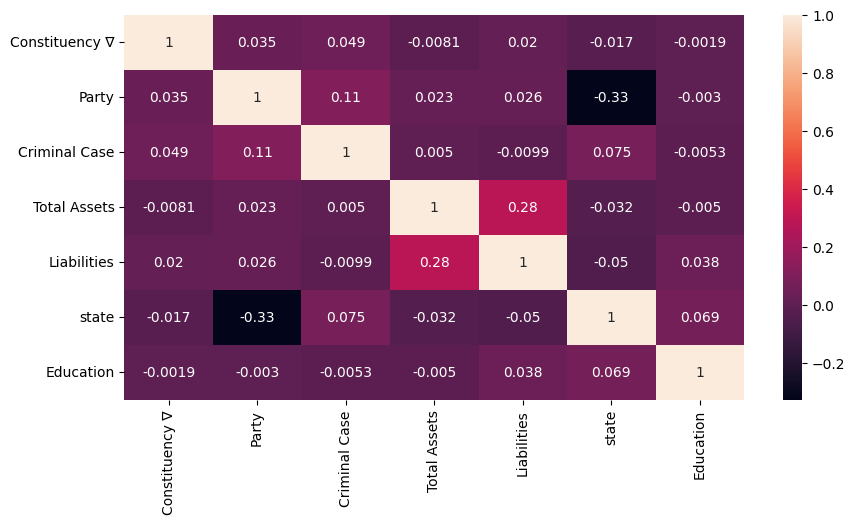

In [21]:
corr=new_df.corr()
plt.figure(figsize=(10,5))

sns.heatmap(corr,annot=True)


In [22]:
X

,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state
0,-1.601596,0.043547,0.466798,3.664445,-0.504042,0.973723
1,-0.219695,-0.521560,-0.373357,-0.361946,-0.570580,-0.195995
2,0.145752,0.231916,-0.373357,-0.246906,0.161336,-0.429938
3,-1.310938,-0.521560,-0.373357,-0.208560,0.227873,-1.365712
4,-1.418022,-0.521560,0.046721,-0.342773,1.458823,1.441611
...,...,...,...,...,...,...
2054,-1.027079,-0.333191,-0.163318,0.788452,-0.237891,-0.312966
2055,0.297030,0.231916,-0.373357,-0.342773,-0.304429,0.739780
2056,0.339524,-0.521560,-0.373357,-0.131866,2.257276,1.207667
2057,1.236995,1.173761,-0.163318,0.098213,2.556696,-0.079023


In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train

,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state
266,-1.178357,-0.521560,-0.373357,-0.323599,-0.537311,1.207667
1133,0.069263,0.231916,-0.373357,-0.361946,-0.437505,-1.248741
1823,0.200144,0.231916,-0.373357,-0.361946,-0.337698,0.739780
1370,1.729924,1.362130,-0.373357,-0.381119,-0.570580,0.271893
67,1.264191,-0.521560,-0.163318,-0.227733,-0.537311,-0.195995
...,...,...,...,...,...,...
1638,1.378075,-0.709929,-0.163318,-0.170213,0.094798,0.388864
1095,-1.302439,1.738869,1.516992,-0.227733,0.793445,-1.365712
1130,-0.787413,0.043547,1.516992,-0.131866,-0.570580,0.973723
1294,1.203000,0.231916,-0.373357,-0.093520,2.456889,-0.429938


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

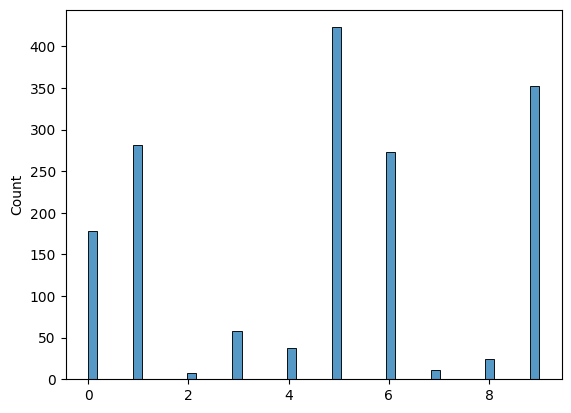

In [24]:
sns.histplot(y_train,bins=50)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

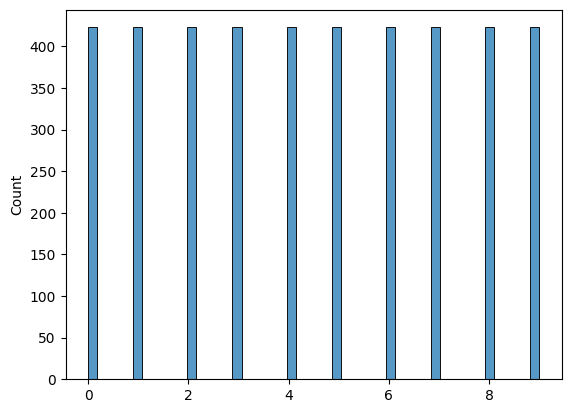

In [25]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

sns.histplot(y_train,bins=50)

In [27]:

features = ['Party', 'Criminal Case', 'Total Assets', 'Liabilities', 'state']
target = 'Education'

In [28]:
# Convert categorical variables to numeric
le = LabelEncoder()

In [29]:
# Combine the training and test data before fitting the LabelEncoder
combined = pd.concat([data[features], data_test[features]])

In [31]:
for feature in features:
    le.fit(combined[feature])
    data[feature] = le.transform(data[feature])
    data_test[feature] = le.transform(data_test[feature])

X = data[features]
y = le.fit_transform(data[target])
X_test = data_test[features]
# Initialize the classifiers with optimal hyperparameters
# RandomForestClassifier with optimal hyperparameters
rf = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_split=5, min_samples_leaf=2, random_state=42)
# DecisionTreeClassifier with optimal hyperparameters
dtc = DecisionTreeClassifier(max_depth=7, min_samples_split=5, criterion='gini', random_state=42)

# KNeighborsClassifier with optimal hyperparameters
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
# Create a voting classifier using the three classifiers
voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('dtc', dtc),
    ('knn', knn)
], voting='hard')  
# Train the voting classifier
voting_clf.fit(X, y)

# Predict on the test set
predictions = voting_clf.predict(X_test)

# Convert the numeric predictions back to the original classes
predictions = le.inverse_transform(predictions)

ValueError: y contains previously unseen labels: 7

In [32]:
# Write the predictions to a CSV file
predictions
len(predictions)

1374

In [33]:
# Write the predictions to a CSV file
submission_df = pd.DataFrame({'ID': data_test['ID'], 'Education': predictions})
submission_df.to_csv('submission.csv',index=False)

In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score

# Load data
df=pd.read_csv('/kaggle/input/who-is-the-real-winner/train.csv')
df_test=pd.read_csv('/kaggle/input/who-is-the-real-winner/test.csv')
features = [ 'Party', 'Criminal Case', 'Total Assets', 'Liabilities', 'state']
target = 'Education'

# Convert categorical variables to numeric
le = LabelEncoder()
scale=StandardScaler()
# Combine the training and test data before fitting the LabelEncoder
combined = pd.concat([df[features], df_test[features]])

for feature in features:
    le.fit(combined[feature])
    df[feature] = le.transform(df[feature])
    df_test[feature] = le.transform(df_test[feature])
    
    
    
    
X = df[features]
y = le.fit_transform(df[target])
X_test = df_test[features]



In [35]:
for feature in features:
    X[feature] = scale.fit_transform(np.array(X[feature]).reshape(-1,1))
    X[feature] = scale.fit_transform(np.array(X[feature]).reshape(-1,1))
    
X

/tmp/ipykernel_33/1346125026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = scale.fit_transform(np.array(X[feature]).reshape(-1,1))
/tmp/ipykernel_33/1346125026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = scale.fit_transform(np.array(X[feature]).reshape(-1,1))
/tmp/ipykernel_33/1346125026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,Party,Criminal Case,Total Assets,Liabilities,state
0,0.043547,0.600431,-0.312677,-0.361891,0.973723
1,-0.521560,-0.440215,-1.152018,-0.936800,-0.195995
2,0.231916,-0.440215,1.407971,-0.222520,-0.429938
3,-0.521560,-0.440215,1.995510,-0.135412,-1.365712
4,-0.521560,0.080108,-0.396611,1.380257,1.441611
...,...,...,...,...,...
2054,-0.333191,-0.180053,1.128191,-0.867114,-0.312966
2055,0.231916,-0.440215,-0.396611,1.990009,0.739780
2056,-0.521560,-0.440215,-0.830271,2.146803,1.207667
2057,1.173761,-0.180053,-0.158798,2.390703,-0.079023


In [37]:
# Initialize the classifiers with optimal hyperparameters
# RandomForestClassifier with optimal hyperparameters
rf = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_split=5, min_samples_leaf=2, random_state=42)

# DecisionTreeClassifier with optimal hyperparameters
dtc = DecisionTreeClassifier(max_depth=7, min_samples_split=5, criterion='gini', random_state=42)

# KNeighborsClassifier with optimal hyperparameters
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Create a voting classifier using the three classifiers
voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('dtc', dtc),
    ('knn', knn)
], voting='hard')  # You can also try voting='soft' for weighted voting

# Train the voting classifier
voting_clf.fit(X, y)

# Predict on the test set
predictions = voting_clf.predict(X_test)

# Convert the numeric predictions back to the original classes
nn=pd.read_csv('/kaggle/input/who-is-the-real-winner/train.csv')
nn['Education']=le.fit_transform(nn['Education'])
predictions = le.inverse_transform(predictions)

# Write the predictions to a CSV file
submission_df = pd.DataFrame({'ID': df_test['ID'], 'Education': predictions})


In [ ]:
submission_df

In [ ]:
submission_df.to_csv('submission.csv', index=False)